In [1]:
# Importing the libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from opensky_api import OpenSkyApi

In [3]:
# Importing the dataset of Sensornet
start_date = int(pd.to_datetime('2025-03-01').timestamp())
end_date = int(pd.to_datetime('2025-03-03').timestamp())

response =requests.get(f'https://sensornet.nl/dataserver3/event/collection/nina_events/stream?conditions%5B0%5D%5B%5D=time&conditions%5B0%5D%5B%5D=%3E%3D&conditions%5B0%5D%5B%5D={start_date}&conditions%5B1%5D%5B%5D=time&conditions%5B1%5D%5B%5D=%3C&conditions%5B1%5D%5B%5D={end_date}&conditions%5B2%5D%5B%5D=label&conditions%5B2%5D%5B%5D=in&conditions%5B2%5D%5B2%5D%5B%5D=21&conditions%5B2%5D%5B2%5D%5B%5D=32&conditions%5B2%5D%5B2%5D%5B%5D=33&conditions%5B2%5D%5B2%5D%5B%5D=34&args%5B%5D=aalsmeer&args%5B%5D=schiphol&fields%5B%5D=time&fields%5B%5D=location_short&fields%5B%5D=location_long&fields%5B%5D=duration&fields%5B%5D=SEL&fields%5B%5D=SELd&fields%5B%5D=SELe&fields%5B%5D=SELn&fields%5B%5D=SELden&fields%5B%5D=SEL_dB&fields%5B%5D=lasmax_dB&fields%5B%5D=callsign&fields%5B%5D=type&fields%5B%5D=altitude&fields%5B%5D=distance&fields%5B%5D=winddirection&fields%5B%5D=windspeed&fields%5B%5D=label&fields%5B%5D=hex_s&fields%5B%5D=registration&fields%5B%5D=icao_type&fields%5B%5D=serial&fields%5B%5D=operator&fields%5B%5D=tags')

colnames = pd.DataFrame(response.json()['metadata'])
sensornet = pd.DataFrame(response.json()['rows'])
sensornet.columns = colnames.headers

sensornet['time'] = pd.to_datetime(sensornet['time'], unit = 's')

print(sensornet['time'].min(),sensornet['time'].max())

pd.options.display.max_columns = None
sensornet.head()

2025-03-01 02:49:31 2025-03-02 23:08:38


headers,id,location_short,location_long,time,SELd,SELe,SELn,SELden,SEL,SEL_dB,lasmax_dB,distance,altitude,label,windspeed,winddirection,callsign,type,tags,duration,hex_s,registration,icao_type,serial,operator
0,132053151,Aa,Aalsmeerderweg,2025-03-01 06:11:13,131732000.0,0,0,131732000,131732000,81.196898,70.8,525.823,130.6,21,3,320,KLM1282,Canadair CL-600-2B19 CRJ-200LR,None,56,3C4D4A,D-ACJJ,CRJ2,7298,
1,132053161,Aa,Aalsmeerderweg,2025-03-01 06:12:49,170050000.0,0,0,170050000,170050000,82.305758,72.5,431.964,130.6,21,3,320,KLM30K,None,None,65,3C76EF,None,None,None,None
2,132053171,Aa,Aalsmeerderweg,2025-03-01 06:14:19,386116000.0,0,0,386116000,386116000,85.867176,75.5,652.768,132.6,21,3,320,DAL72,Airbus A330 302,None,52,AB4C1D,N827NW,A333,1716,Delta Airlines
3,132053181,Aa,Aalsmeerderweg,2025-03-01 06:16:34,389174000.0,0,0,389174000,389174000,85.901433,75.3,585.282,128.6,21,3,320,KLM423,Airbus SAS A330-303,None,68,484F72,PH-AKB,A333,1294,
4,132053191,Aa,Aalsmeerderweg,2025-03-01 06:18:25,393774000.0,0,0,393774000,393774000,85.952470,75.8,662.326,132.6,21,3,320,KLM192,Airbus SAS A330-303,None,43,4850E6,PH-AKF,A333,1580,


In [4]:
# Importing the dataset of OpenSky
api = OpenSkyApi()
OpenSky = api.get_states()

# Check if the OpenSky object has the 'states' attribute
if hasattr(OpenSky, 'states') and OpenSky.states:
    #Extract data from the 'states' attribute
    data = [
        [
            state.icao24,
            state.callsign,
            state.origin_country,
            state.time_position,
            state.last_contact,
            state.longitude,
            state.latitude,
            state.baro_altitude,
            state.on_ground,
            state.velocity,
            state.true_track,
            state.vertical_rate,
            state.sensors,
            state.geo_altitude,
            state.squawk,
            state.spi,
            state.position_source,
        ]
        for state in OpenSky.states
    ]

    # Define column names
    columns = [
        "icao24",
        "callsign",
        "origin_country",
        "time_position",
        "last_contact",
        "longitude",
        "latitude",
        "baro_altitude",
        "on_ground",
        "velocity",
        "true_track",
        "vertical_rate",
        "sensors",
        "geo_altitude",
        "squawk",
        "spi",
        "position_source",
    ]

    # Create a pandas DataFrame
    opensky = pd.DataFrame(data, columns=columns)

    # Display the first few rows
    print(opensky.head(20))
else:
    print("No states data available in the OpenSky object.")


    icao24  callsign  origin_country  time_position  last_contact  longitude  \
0   a89ea5  N6545H     United States   1.742824e+09    1742823809   -96.8921   
1   4b1816  SWR252B      Switzerland   1.742824e+09    1742823811    25.7719   
2   ab1644  UAL1108    United States   1.742824e+09    1742823810   -79.3573   
3   4b1819  SWR935L      Switzerland   1.742824e+09    1742823811    17.3091   
4   801638  AXB2724            India   1.742824e+09    1742823811    87.9836   
5   408120  VIR26Q    United Kingdom   1.742824e+09    1742823811   -71.7773   
6   aa56db  UAL364     United States   1.742824e+09    1742823811   -93.0035   
7   a7b08d  LXJ595     United States   1.742824e+09    1742823811   -87.9726   
8   88044a  AIQ3430         Thailand   1.742824e+09    1742823810   100.6529   
9   a2e5ec  SKW4136    United States   1.742824e+09    1742823810   -93.7325   
10  aa56da  UAL1262    United States   1.742824e+09    1742823811   -77.0430   
11  39de4a  TVF96UH           France   1

## Matijs zijn code

In [ ]:
# Filteren op vliegtuigtype "Boeing 737-800"
filtered_data = sensornet[sensornet['type'] == 'Boeing 737-800']

# Sorteer de data op 'time' zodat de dichtstbijzijnde tijden bij elkaar komen
filtered_data = filtered_data.sort_values(by=['time'])

# Selecteer alleen de belangrijke kolommen
important_columns = ['time', 'callsign', 'altitude', 'SEL_dB', 'location_long','winddirection','distance','windspeed']
filtered_data_important = filtered_data[important_columns]

#Aalsmeerderweg
#KLM1605

# Vraag de gebruiker om een callsign in te voeren
user_callsign = input("Voer een callsign in om te filteren (of druk op Enter om geen filter toe te passen): ")

# Vraag de gebruiker om een location_long in te voeren
user_location_long = input("Voer een locatie in (location_long) om te filteren (of druk op Enter om geen filter toe te passen): ")

# Filteren op de opgegeven callsign (indien ingevuld)
if user_callsign:
    filtered_data_important = filtered_data_important[filtered_data_important['callsign'] == user_callsign]

# Filteren op de opgegeven location_long (indien ingevuld)
if user_location_long:
    filtered_data_important = filtered_data_important[filtered_data_important['location_long'] == user_location_long]

# Toon de gefilterde en gesorteerde data met alleen de belangrijke kolommen
filtered_data_important.head(500)

headers,time,callsign,altitude,SEL_dB,location_long,winddirection,distance,windspeed
1804,2025-03-01 05:58:19,KLM42W,1712.840,62.384430,Kudelstaartseweg,6,2760.950,2
965,2025-03-01 06:01:33,KLM1750,130.100,67.545460,Uiterweg,354,2346.340,2
573,2025-03-01 06:35:09,KLM70B,335.728,76.987589,Darwinstraat,333,937.400,2
1815,2025-03-01 06:35:19,KLM70B,335.148,68.685190,Kudelstaartseweg,333,1691.800,2
2130,2025-03-01 06:35:56,KLM70B,137.752,90.630419,Blaauwstraat,333,142.734,2
...,...,...,...,...,...,...,...,...
3067,2025-03-02 18:43:53,KLM54G,140.500,74.767991,Hornweg,323,956.936,2
1770,2025-03-02 18:46:43,KLM1782,373.204,66.092787,Copierstraat,323,2247.360,2
904,2025-03-02 18:46:47,KLM1782,343.961,77.258769,Darwinstraat,323,940.599,2
2075,2025-03-02 18:46:52,KLM1782,343.313,68.565636,Kudelstaartseweg,323,1693.620,2


/var/folders/8p/lzt_10x12c52fwzk6d2zn91m0000gn/T/ipykernel_22910/1572739277.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


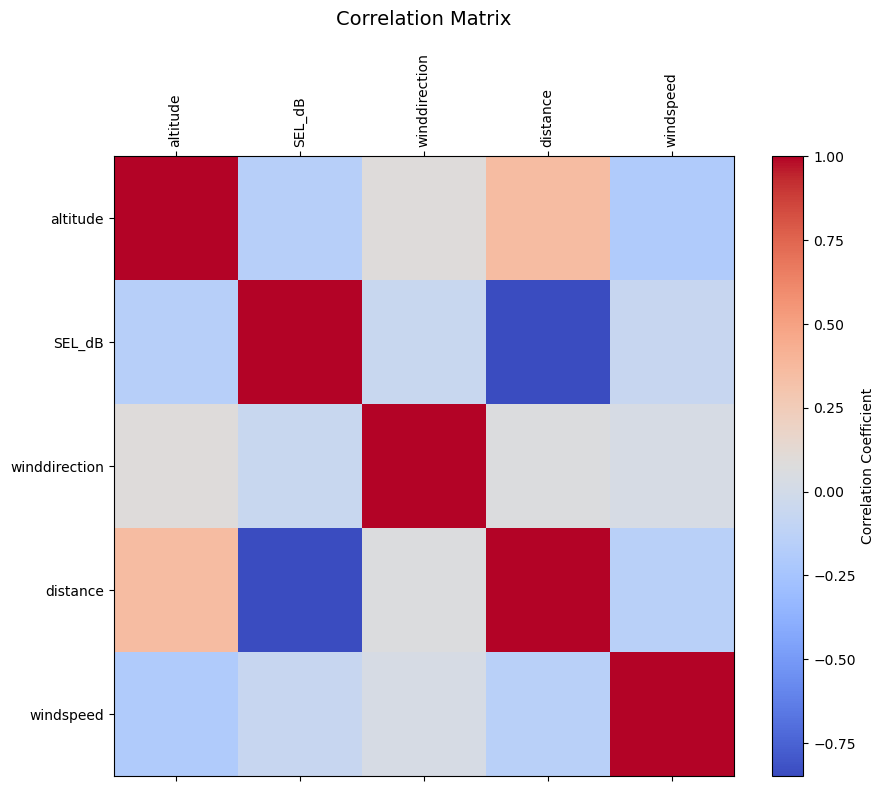

In [6]:
# Select only numeric columns
numeric_data = filtered_data_important.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the figure and axis
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability

# Use a more visually appealing colormap
cmap = plt.cm.coolwarm

# Display the correlation matrix
plt.matshow(correlation_matrix, cmap=cmap, fignum=1)

# Add a colorbar
plt.colorbar(label='Correlation Coefficient')

# Add labels for the axes
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, fontsize=10)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)

# Add a title
plt.title('Correlation Matrix', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()